# 20MIA1031
# SANJAY.M

## Twitter scrapping


In [ ]:
import pandas as pd
import numpy as np 
import re 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [ ]:
pip install twint

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install nest_asyncio

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
pip install --user --upgrade -e git+https://github.com/twintproject/twint.git@origin/master#egg=twint;

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Obtaining twint from git+https://github.com/twintproject/twint.git@origin/master#egg=twint
  Updating ./src/twint clone (to revision origin/master)
  Running command git fetch -q --tags
  Running command git reset --hard -q origin/master
  Preparing metadata (setup.py) ... done
  Attempting uninstall: twint
    Found existing installation: twint 2.1.21
    Uninstalling twint-2.1.21:
      Successfully uninstalled twint-2.1.21
  Running setup.py develop for twint


In [ ]:
import twint
import pandas as pd
import nest_asyncio 
nest_asyncio.apply() #necessary to allow asyncio to end event loop
import nltk
nltk.download('punkt')
nltk.download('wordnet')
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.corpus import stopwords
from textblob import TextBlob
from wordcloud import WordCloud, STOPWORDS

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
s = twint.Config()
s.Search = "health" 
s.Lang = "en"
s.Limit = 1000          # optional
s.Since = '2020-06-27 00:00:00' 
s.until = '2020-12-31 00:00:00' 
#Store script in csv file
s.Store_csv = True 
s.Output = "health.csv"
twint.run.Search(s)

1630047826695843841 2023-02-27 03:31:01 +0000 <AshokMa81098907> Sant Shri Asharamji Bapu अपने सत्संग में बताते हैं #वसंत_ऋतुचर्या में उचित आहार विहार की जानकारी द्वारा Swasthya Labh लिया जा सकता है। जिन्हें ऐसे घरेलू, सस्ते व Easy Health Tips जो बड़ी से बड़ी बीमारियों में भी कारगर सिद्ध होते हैं।  https://t.co/sfF8ibQUnD
1630047824196014080 2023-02-27 03:31:00 +0000 <Raghav72179037> @JantaKeeAwaaz Sant Shri Asharamji Bapu बताते हैं #वसंत_ऋतुचर्या में Swasthya Labh के बारे में -  इस ऋतु में कफ को कुपित करने वाले पौष्टिक और गरिष्ठ पदार्थों की मात्रा धीरे-धीरे कम करते हुए बंद करके सादा सुपाच्य आहार लेना शुरू कर देना चाहिए।  Easy Health Tips  https://t.co/6Gyrsumrc3
1630047822157586437 2023-02-27 03:31:00 +0000 <ConservativeO17> Jill Biden Gives Update On Joe’s Health   https://t.co/ejQs5bIgvv
1630047821872218112 2023-02-27 03:31:00 +0000 <HealthPolicyW> Eight Hundred Women Die Every Day During Pregnancy or Childbirth |  https://t.co/sIV5s0cMnp #ICYMI @JennyCresswell @DrTedros @ABanerjeeWH

In [ ]:
s.Store_json = True #Save in Json format
s.Output = "health.json" #Output directory to save file

In [ ]:
#Run 
twint.run.Search(s) #Run twint script
#This we display all the 

1630047963719532544 2023-02-27 03:31:34 +0000 <ANOOPKU29367012> @ashramgoregaon Sant Shri Asharamji Bapu #वसंत_ऋतुचर्या में हल्का व सुपाच्य भोजन लेना चाहिए।कफ को अवशोषित करने वाले पदार्थ हितकारी हैं।भारी व गरिष्ठ पदार्थ नहीं लेने चाहिए। Easy Health Tips Swasthya Labh  https://t.co/CgUSg9kl0T
1630047962737913857 2023-02-27 03:31:33 +0000 <AnuoluwapoDs> I got global disrespect global abuse global harrd global attacks all my pregnancy eliminated constantly on site i get attacked when  I sleep o get abused cctv voices ruins my mental heath everyone has an agenda against me I do not for in any where SO I HAVE A REASON
1630047962595467264 2023-02-27 03:31:33 +0000 <niayons> Tapi kena pulau, kena fitnah banyak le kot. Mental health terganggu. Aku ada short term memory. Tak berapa nak ingat dah macamana duduk asrama. Hshshshshsh
1630047961802772485 2023-02-27 03:31:33 +0000 <Archana97430714> इस सीजन में कफ बढ़ेगा कफ दूर करने के लिए गौचरण बटी चूसकर खाने  से कफ दूर हो जाता है। Sant Shri Asharamj

In [ ]:
#code to help increase the number of columns that can be displayed.
pd.options.display.max_columns= 100 #Set to display a maximum of 100 columns

In [ ]:
#Since the data is a json file, we will need to read data using Pandas
stand_df = pd.read_csv("health.csv") # Directory Path to store Data

In [ ]:

stand_df.shape #Shapes gives the row & columns

(1017, 36)

In [ ]:

stand_df.head() #Top 5 rows

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1630047826695843841,1630047826695843841,2023-02-27 03:31:01 UTC,2023-02-27,03:31:01,0,1482655199906996225,ashokma81098907,Ashok Maheshwari,NaN,Sant Shri Asharamji Bapu अपने सत्संग में बताते...,hi,[],['https://youtu.be/KX6LN21QOC0'],[],0,0,0,['वसंत_ऋतुचर्या'],[],https://twitter.com/AshokMa81098907/status/163...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
1,1630047824196014080,1630038181130424320,2023-02-27 03:31:00 UTC,2023-02-27,03:31:00,0,1290292414934990848,raghav72179037,Raghavendra,NaN,@JantaKeeAwaaz Sant Shri Asharamji Bapu बताते ...,hi,[],[],['https://pbs.twimg.com/media/Fp8X2M7WIAMKiov....,0,0,0,['वसंत_ऋतुचर्या'],[],https://twitter.com/Raghav72179037/status/1630...,False,NaN,1,https://pbs.twimg.com/media/Fp8X2M7WIAMKiov.jpg,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'JantaKeeAwaaz', 'name': 'Jan...",NaN,NaN,NaN,NaN
2,1630047822157586437,1630047822157586437,2023-02-27 03:31:00 UTC,2023-02-27,03:31:00,0,1530045783231410178,conservativeo17,Conservative Opinion,NaN,Jill Biden Gives Update On Joe’s Health http...,en,[],['https://conservativeon.com/2022/07/25/jill-b...,[],0,0,0,[],[],https://twitter.com/ConservativeO17/status/163...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1630047821872218112,1630047821872218112,2023-02-27 03:31:00 UTC,2023-02-27,03:31:00,0,930424388855435264,healthpolicyw,Health Policy Watch - Global Health News Repor...,NaN,Eight Hundred Women Die Every Day During Pregn...,en,"[{'screen_name': 'jennycresswell', 'name': 'je...",['https://bit.ly/3XSHH0N'],['https://pbs.twimg.com/media/Fp5la3wWIAcjg6H....,0,0,0,['icymi'],[],https://twitter.com/HealthPolicyW/status/16300...,False,NaN,1,https://pbs.twimg.com/media/Fp5la3wWIAcjg6H.jpg,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
4,1630047814297464832,1630047814297464832,2023-02-27 03:30:58 UTC,2023-02-27,03:30:58,0,1109652518257065984,g1matthewin,winwinwin-,NaN,Happineis good health and a bad https://t.co/...,en,[],['http://memory.You'],[],0,0,0,['apoflytoparis'],[],https://twitter.com/G1Matthewin/status/1630047...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN


In [ ]:
stand_df.columns # Observe the Columns header gotten using Twint


Index(['id', 'conversation_id', 'created_at', 'date', 'time', 'timezone',
       'user_id', 'username', 'name', 'place', 'tweet', 'language', 'mentions',
       'urls', 'photos', 'replies_count', 'retweets_count', 'likes_count',
       'hashtags', 'cashtags', 'link', 'retweet', 'quote_url', 'video',
       'thumbnail', 'near', 'geo', 'source', 'user_rt_id', 'user_rt',
       'retweet_id', 'reply_to', 'retweet_date', 'translate', 'trans_src',
       'trans_dest'],
      dtype='object')

In [ ]:
#I want to get the "Tweet" Column from the Json table.
Tweet = stand_df.filter(['tweet'])

In [ ]:
Tweet.head(10)

,tweet
0,Sant Shri Asharamji Bapu अपने सत्संग में बताते...
1,@JantaKeeAwaaz Sant Shri Asharamji Bapu बताते ...
2,Jill Biden Gives Update On Joe’s Health http...
3,Eight Hundred Women Die Every Day During Pregn...
4,Happineis good health and a bad https://t.co/...
5,Basant Ritu ki health trips #वसंत_ऋतुचर्या San...
6,@sahay_sandhya @YssSpeaks #वसंत_ऋतुचर्या Easy ...
7,@JantaKeeAwaaz Sant Shri Asharamji Bapu કહે છે...
8,@aditi_ambadkar Only when it takes a toll on y...
9,@LokKalyanSetu Swasthya Labh के लिए Sant Shri ...


In [ ]:
Tweet['tweet']

0       Sant Shri Asharamji Bapu अपने सत्संग में बताते...
1       @JantaKeeAwaaz Sant Shri Asharamji Bapu बताते ...
2       Jill Biden Gives Update On Joe’s Health   http...
3       Eight Hundred Women Die Every Day During Pregn...
4       Happineis good health and a bad  https://t.co/...
                              ...                        
1012    @RiyaRan62163524 @JantaKeeAwaaz Sant Shri Asha...
1013    @tcarpenter216 @JoeWasserman @Cucho @Cassie_Bo...
1014    Vaccinated Latin Americans Halting Covid; Not ...
1015    If you get health care coverage through Medica...
1016    The Chautauqua County Health Department announ...
Name: tweet, Length: 1017, dtype: object

In [ ]:
#Clean the text
import re 

#Create a function to clean the tweets
def cleanTxt(text):
    text = re.sub(r'@[A-Za-z0-9]+', '', text) #Remove @mentions replace with blank
    text = re.sub(r'#', '', text) #Remove the '#' symbol, replace with blank
    text = re.sub(r'RT[\s]+', '', text) #Removing RT, replace with blank
    text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyperlinks
    
    return text

#Cleaning the text
Tweet['tweet']= Tweet['tweet'].apply(cleanTxt)

#Show the clean text
Tweet

,tweet
0,Sant Shri Asharamji Bapu अपने सत्संग में बताते...
1,Sant Shri Asharamji Bapu बताते हैं वसंत_ऋतुचर...
2,Jill Biden Gives Update On Joe’s Health
3,Eight Hundred Women Die Every Day During Pregn...
4,Happineis good health and a bad can't stay i...
...,...
1012,Sant Shri Asharamji Bapu वसंत_ऋतुचर्या के E...
1013,"_Boness For the latter, it *is* the case th..."
1014,Vaccinated Latin Americans Halting Covid; Not ...
1015,If you get health care coverage through Medica...


In [ ]:
#Next we have to remove emoji from the Tweet data.
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
Tweet['tweet']= Tweet['tweet'].apply(remove_emoji)

#Show the clean text
Tweet

,tweet
0,Sant Shri Asharamji Bapu अपने सत्संग में बताते...
1,Sant Shri Asharamji Bapu बताते हैं वसंत_ऋतुचर...
2,Jill Biden Gives Update On Joe’s Health
3,Eight Hundred Women Die Every Day During Pregn...
4,Happineis good health and a bad can't stay i...
...,...
1012,Sant Shri Asharamji Bapu वसंत_ऋतुचर्या के E...
1013,"_Boness For the latter, it *is* the case th..."
1014,Vaccinated Latin Americans Halting Covid; Not ...
1015,If you get health care coverage through Medica...


In [ ]:
#Create a function to get the subjectivity
def getSubjectivity(text):
    return TextBlob(text).sentiment.subjectivity

#Create a function to get Polarity
def getPolarity(text):
    return TextBlob(text).sentiment.polarity

#Now we create a new column for what we just did and add it to the Tweet_df dataframe
Tweet['Subjectivity'] = Tweet['tweet'].apply(getSubjectivity)
Tweet['Polarity'] = Tweet['tweet'].apply(getPolarity)

#Now display data
Tweet

,tweet,Subjectivity,Polarity
0,Sant Shri Asharamji Bapu अपने सत्संग में बताते...,0.833333,4.333333e-01
1,Sant Shri Asharamji Bapu बताते हैं वसंत_ऋतुचर...,0.833333,4.333333e-01
2,Jill Biden Gives Update On Joe’s Health,0.000000,0.000000e+00
3,Eight Hundred Women Die Every Day During Pregn...,0.000000,0.000000e+00
4,Happineis good health and a bad can't stay i...,0.633333,5.551115e-17
...,...,...,...
1012,Sant Shri Asharamji Bapu वसंत_ऋतुचर्या के E...,0.833333,4.333333e-01
1013,"_Boness For the latter, it *is* the case th...",0.427778,-8.333333e-02
1014,Vaccinated Latin Americans Halting Covid; Not ...,0.300000,2.000000e-01
1015,If you get health care coverage through Medica...,0.000000,0.000000e+00


In [ ]:
#Group the range of Polarity to different categories
def getInsight(score):
    if score < 0:
        return "Negative"
    elif score == 0:
        return "Neutral"
    else:
        return "Positive"
    
Tweet["Insight"] = Tweet["Polarity"].apply(getInsight)

Tweet.head(50)


,tweet,Subjectivity,Polarity,Insight
0,Sant Shri Asharamji Bapu अपने सत्संग में बताते...,0.833333,4.333333e-01,Positive
1,Sant Shri Asharamji Bapu बताते हैं वसंत_ऋतुचर...,0.833333,4.333333e-01,Positive
2,Jill Biden Gives Update On Joe’s Health,0.000000,0.000000e+00,Neutral
3,Eight Hundred Women Die Every Day During Pregn...,0.000000,0.000000e+00,Neutral
4,Happineis good health and a bad can't stay i...,0.633333,5.551115e-17,Positive
5,Basant Ritu ki health trips वसंत_ऋतुचर्या Sant...,0.833333,4.333333e-01,Positive
6,_sandhya वसंत_ऋतुचर्या Easy Health Tips by Sa...,0.686667,2.966667e-01,Positive
7,Sant Shri Asharamji Bapu કહે છે સૂર્યોદય થી પ...,0.833333,4.333333e-01,Positive
8,_ambadkar Only when it takes a toll on your he...,0.875000,1.250000e-01,Positive
9,Swasthya Labh के लिए Sant Shri Asharamji Bapu...,0.833333,5.416667e-01,Positive


In [ ]:
Tweet["Insight"].value_counts()

Positive    689
Negative    165
Neutral     163
Name: Insight, dtype: int64

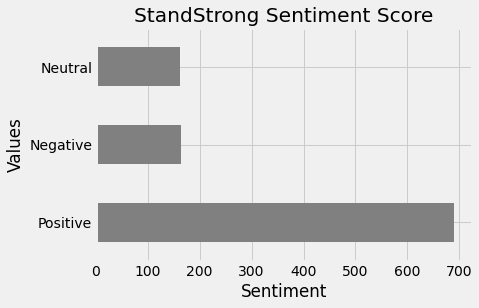

In [ ]:
import matplotlib.pyplot as plt

#Plot the values count of polarity
plt.title("StandStrong Sentiment Score")
plt.xlabel("Sentiment")
plt.ylabel("Values")
Tweet["Insight"].value_counts().plot(kind="barh", color="Gray")
plt.show()

In [ ]:
#Top Followers by tweet
stand_df["username"].value_counts()

nicktompan         31
harioanandmohan    13
asha95033076       12
udjadhav1          10
vandana06808444    10
                   ..
onye_emeakwari      1
coleppc1            1
gfienberg17         1
ace567ace           1
wgrz                1
Name: username, Length: 805, dtype: int64

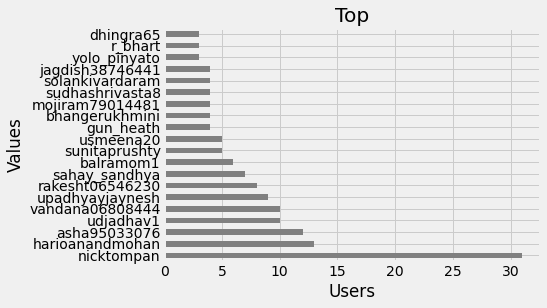

In [ ]:
#Plot the values count of polarity
plt.title("Top")
plt.xlabel("Users")
plt.ylabel("Values")
stand_df["username"].value_counts()[:20].plot(kind="barh", color="Gray")
plt.show()

In [ ]:
import seaborn as sns
import warnings

In [ ]:
stand_df["date"] = pd.to_datetime(stand_df["date"]).dt.date 
#Helps change the datatype from datetime to date only

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


(array([0]), [Text(0, 0, '2023-02-27')])

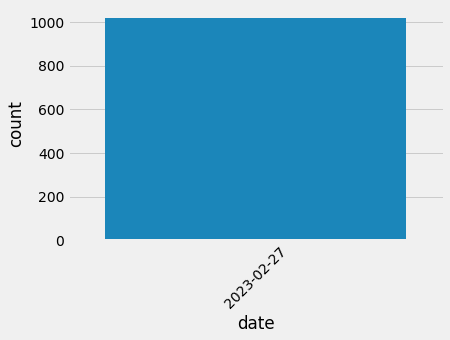

In [ ]:
sns.countplot(stand_df["date"])
plt.xticks(rotation = 45)

In [ ]:
stopwords = STOPWORDS
print(stopwords)
#Let checkout the stop words in Python

{'again', 'my', "aren't", 'off', "you've", 'if', 'ought', 'can', 'have', 'further', 'shall', 'those', 'after', 'some', 'be', 'else', "he'd", 'is', 'hers', 'not', 'he', 'she', "i'll", "wouldn't", 'from', 'under', 'the', 'about', 'between', 'cannot', "that's", 'of', 'own', 'this', "we'll", 'all', 'whom', "you'd", 'you', "don't", 'yourself', "won't", 'above', 'because', "can't", 'before', 'i', "you'll", 'by', 'so', 'yourselves', 'could', "i'd", 'theirs', 'since', 'over', 'very', 'how', "she'd", 'hence', 'their', 'too', "who's", "doesn't", 'does', 'been', 'same', 'com', 'herself', "mustn't", 'would', "hasn't", 'me', "why's", 'ours', 'both', "what's", "isn't", 'get', 'that', 'below', 'against', "they've", "where's", 'his', 'otherwise', "here's", 'our', 'out', 'was', 'why', 'her', 'at', 'into', "it's", "shan't", 'while', 'only', 'itself', "you're", 'its', 'themselves', 'www', 'being', 'himself', 'these', 'but', "she'll", "shouldn't", 'ever', "we've", "let's", 'any', 'what', "she's", 'most', 

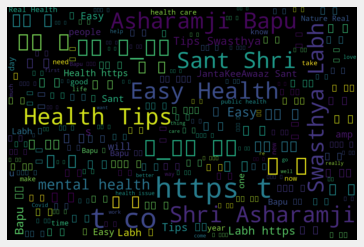

In [ ]:
#Let create a wordcloud for better representation of data
Tweet_Word = ' '.join( [twts for twts in stand_df['tweet']] ) #To join all tweet
wc = WordCloud(
        background_color = "black",
        stopwords = stopwords,
        height = 1000,
        width = 1500,
        random_state = 21,
        max_font_size = 120
)
wc.generate(Tweet_Word)

plt.imshow(wc, interpolation = 'bilinear')
plt.axis('off')
plt.show()

# covid3 data

In [ ]:
s = twint.Config()
s.Search = "covid3" 
s.Lang = "en"
s.Limit = 1000          # optional
s.Since = '2020-06-27 00:00:00' 
s.until = '2020-12-31 00:00:00' 
#Store script in csv file
s.Store_csv = True 
s.Output = "covid3.csv"
twint.run.Search(s)

1629681202188767235 2023-02-26 03:14:11 +0000 <giovann72> @kanfootballclub Top =Rea  flop Pantemis
1628907257990610944 2023-02-23 23:58:48 +0000 <giovann72> @Aaron_Derfel Your still at with the Covid guess the fifth sixth jab ain’t working quick double mask and time for number six … one trick pony
1628514281825136641 2023-02-22 21:57:15 +0000 <cmdarwindavid> Covid³
1628489203901235203 2023-02-22 20:17:36 +0000 <MrPoleador> @casillistaaa Rico si el Covid3.0
1628226835405320192 2023-02-22 02:55:03 +0000 <giovann72> @manofbird Looks like two donkeys too me so beastality
1627285476913688578 2023-02-19 12:34:25 +0000 <jucamirand> E assim nasce o CoVID3
1627106045964300288 2023-02-19 00:41:26 +0000 <giovann72> @BBNMedias @OneFootball Thanks 🙏
1627098575762071552 2023-02-19 00:11:45 +0000 <giovann72> @BBNMedias Is the game Vs rowdies on Apple TV ?
1626869193131057152 2023-02-18 09:00:16 +0000 <Tia_Pryce> @thehill Ukraine another excuse for the Govt to shake down American Citizens for 100 Bill

In [ ]:
stand_df = pd.read_csv("covid3.csv") 
stand_df

,id,conversation_id,created_at,date,time,timezone,user_id,username,name,place,tweet,language,mentions,urls,photos,replies_count,retweets_count,likes_count,hashtags,cashtags,link,retweet,quote_url,video,thumbnail,near,geo,source,user_rt_id,user_rt,retweet_id,reply_to,retweet_date,translate,trans_src,trans_dest
0,1629681202188767235,1629680242301313024,2023-02-26 03:14:11 UTC,2023-02-26,03:14:11,0,323269450,giovann72,Covid3,NaN,@kanfootballclub Top =Rea flop Pantemis,en,[],[],[],0,0,1,[],[],https://twitter.com/giovann72/status/162968120...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'kanfootballclub', 'name': 'K...",NaN,NaN,NaN,NaN
1,1628907257990610944,1628562015290638337,2023-02-23 23:58:48 UTC,2023-02-23,23:58:48,0,323269450,giovann72,Covid3,NaN,@Aaron_Derfel Your still at with the Covid gue...,en,[],[],[],0,0,0,[],[],https://twitter.com/giovann72/status/162890725...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Aaron_Derfel', 'name': 'Aaro...",NaN,NaN,NaN,NaN
2,1628514281825136641,1628514281825136641,2023-02-22 21:57:15 UTC,2023-02-22,21:57:15,0,70880291,cmdarwindavid,Darwin David ,NaN,Covid³,en,[],[],[],0,0,2,[],[],https://twitter.com/cmdarwindavid/status/16285...,False,https://twitter.com/MundialesPt/status/1628473...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
3,1628489203901235203,1628465238768078850,2023-02-22 20:17:36 UTC,2023-02-22,20:17:36,0,4200955036,mrpoleador,Bigotes Mckenzie,NaN,@casillistaaa Rico si el Covid3.0,es,[],[],[],0,0,5,[],[],https://twitter.com/MrPoleador/status/16284892...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'casillistaaa', 'name': 'Pros...",NaN,NaN,NaN,NaN
4,1628226835405320192,1628184686450155520,2023-02-22 02:55:03 UTC,2023-02-22,02:55:03,0,323269450,giovann72,Covid3,NaN,@manofbird Looks like two donkeys too me so be...,en,[],[],[],0,0,0,[],[],https://twitter.com/giovann72/status/162822683...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'manofbird', 'name': 'Ted Bir...",NaN,NaN,NaN,NaN
5,1627285476913688578,1627285476913688578,2023-02-19 12:34:25 UTC,2023-02-19,12:34:25,0,1558524374931709953,jucamirand,𝔐𝔬𝔯𝔭𝔥𝔢𝔲𝔰,NaN,E assim nasce o CoVID3,pt,[],[],[],0,0,6,[],[],https://twitter.com/jucamirand/status/16272854...,False,https://twitter.com/criticaduvidosa/status/162...,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,[],NaN,NaN,NaN,NaN
6,1627106045964300288,1627079944290566144,2023-02-19 00:41:26 UTC,2023-02-19,00:41:26,0,323269450,giovann72,Covid3,NaN,@BBNMedias @OneFootball Thanks 🙏,en,[],[],[],0,0,1,[],[],https://twitter.com/giovann72/status/162710604...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BBNMedias', 'name': 'BBN Méd...",NaN,NaN,NaN,NaN
7,1627098575762071552,1627079944290566144,2023-02-19 00:11:45 UTC,2023-02-19,00:11:45,0,323269450,giovann72,Covid3,NaN,@BBNMedias Is the game Vs rowdies on Apple TV ?,en,[],[],[],1,0,0,[],[],https://twitter.com/giovann72/status/162709857...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'BBNMedias', 'name': 'BBN Méd...",NaN,NaN,NaN,NaN
8,1626869193131057152,1626817802752389121,2023-02-18 09:00:16 UTC,2023-02-18,09:00:16,0,54386976,tia_pryce,Tia Pryce,NaN,@thehill Ukraine another excuse for the Govt t...,en,[],[],[],0,1,0,"['iraq', 'covid', '2008crash', 'israel', 'liby...",[],https://twitter.com/Tia_Pryce/status/162686919...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'thehill', 'name': 'The Hill'...",NaN,NaN,NaN,NaN
9,1626680136408899585,1626565671164297218,2023-02-17 20:29:01 UTC,2023-02-17,20:29:01,0,1429876127477211147,mjnanostretch,MJ Allen,NaN,@Ayjchan But it is a huge loss seeing that no ...,en,[],[],[],1,0,2,[],[],https://twitter.com/MJnanostretch/status/16266...,False,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[{'screen_name': 'Ayjchan', 'name': 'Alina Cha...",NaN,NaN,NaN,NaN


In [ ]:
Tweet = stand_df.filter(['geo','tweet','place','date'])
Tweet

,geo,tweet,place,date
0,NaN,@kanfootballclub Top =Rea flop Pantemis,NaN,2023-02-26
1,NaN,@Aaron_Derfel Your still at with the Covid gue...,NaN,2023-02-23
2,NaN,Covid³,NaN,2023-02-22
3,NaN,@casillistaaa Rico si el Covid3.0,NaN,2023-02-22
4,NaN,@manofbird Looks like two donkeys too me so be...,NaN,2023-02-22
5,NaN,E assim nasce o CoVID3,NaN,2023-02-19
6,NaN,@BBNMedias @OneFootball Thanks 🙏,NaN,2023-02-19
7,NaN,@BBNMedias Is the game Vs rowdies on Apple TV ?,NaN,2023-02-19
8,NaN,@thehill Ukraine another excuse for the Govt t...,NaN,2023-02-18
9,NaN,@Ayjchan But it is a huge loss seeing that no ...,NaN,2023-02-17


In [ ]:
# create a function to clean the tweets
def cleanTxt(text):
    #Remove @mentions and replace with blank
    text = re.sub(r'@[A-Za-z0–9]+', '', text) 
    
    #Remove the '#' symbol, replace with blank
    text = re.sub(r'#', '', text) 
    
    #Removing RT, replace with blank
    text = re.sub(r'RT[\s]+', '', text) 
    
    #Remove the hyperlinks
    text = re.sub(r'https?:\/\/\S+', '', text) 
 
    return text
# clean the text
Tweet['tweet']= Tweet['tweet'].apply(cleanTxt)
#Show the clean text
Tweet

,geo,tweet,place,date
0,NaN,Top =Rea flop Pantemis,NaN,2023-02-26
1,NaN,_Derfel Your still at with the Covid guess the...,NaN,2023-02-23
2,NaN,Covid³,NaN,2023-02-22
3,NaN,Rico si el Covid3.0,NaN,2023-02-22
4,NaN,Looks like two donkeys too me so beastality,NaN,2023-02-22
5,NaN,E assim nasce o CoVID3,NaN,2023-02-19
6,NaN,Thanks 🙏,NaN,2023-02-19
7,NaN,Is the game Vs rowdies on Apple TV ?,NaN,2023-02-19
8,NaN,Ukraine another excuse for the Govt to shake ...,NaN,2023-02-18
9,NaN,But it is a huge loss seeing that no agreemen...,NaN,2023-02-17


In [ ]:
def remove_emoji(string):
    emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002500-\U00002BEF"  # chinese char
                               u"\U00002702-\U000027B0"
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               u"\U0001f926-\U0001f937"
                               u"\U00010000-\U0010ffff"
                               u"\u2640-\u2642"
                               u"\u2600-\u2B55"
                               u"\u200d"
                               u"\u23cf"
                               u"\u23e9"
                               u"\u231a"
                               u"\ufe0f"  # dingbats
                               u"\u3030"
                               "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', string)

#Cleaning the text
Tweet['tweet']= Tweet['tweet'].apply(remove_emoji)

#Show the clean text
Tweet

,geo,tweet,place,date
0,NaN,Top =Rea flop Pantemis,NaN,2023-02-26
1,NaN,_Derfel Your still at with the Covid guess the...,NaN,2023-02-23
2,NaN,Covid³,NaN,2023-02-22
3,NaN,Rico si el Covid3.0,NaN,2023-02-22
4,NaN,Looks like two donkeys too me so beastality,NaN,2023-02-22
5,NaN,E assim nasce o CoVID3,NaN,2023-02-19
6,NaN,Thanks,NaN,2023-02-19
7,NaN,Is the game Vs rowdies on Apple TV ?,NaN,2023-02-19
8,NaN,Ukraine another excuse for the Govt to shake ...,NaN,2023-02-18
9,NaN,But it is a huge loss seeing that no agreemen...,NaN,2023-02-17


In [ ]:
Tweet['date'] = pd.to_datetime(Tweet['date']).dt.date 

In [ ]:
Tweet['date'].unique()

array([datetime.date(2023, 2, 26), datetime.date(2023, 2, 23),
       datetime.date(2023, 2, 22), datetime.date(2023, 2, 19),
       datetime.date(2023, 2, 18), datetime.date(2023, 2, 17),
       datetime.date(2023, 2, 14), datetime.date(2023, 2, 12),
       datetime.date(2023, 2, 11), datetime.date(2023, 2, 5),
       datetime.date(2023, 2, 4), datetime.date(2023, 2, 3),
       datetime.date(2023, 2, 1), datetime.date(2023, 1, 30),
       datetime.date(2023, 1, 25), datetime.date(2023, 1, 24),
       datetime.date(2023, 1, 22), datetime.date(2023, 1, 19),
       datetime.date(2023, 1, 15)], dtype=object)